# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | bongandanga
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | rantauprapat
Processing Record 9 of Set 1 | uyovu
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | disraeli
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | pavelets
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,-3.22,78,98,3.33,RU,1675639538
1,cidreira,-30.1811,-50.2056,23.78,76,64,4.39,BR,1675639538
2,bongandanga,1.5000,21.0500,24.12,33,52,0.76,CD,1675639539
3,ushuaia,-54.8000,-68.3000,7.79,71,56,3.67,AR,1675638729
4,dikson,73.5069,80.5464,-19.10,97,100,0.74,RU,1675639539


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,-3.22,78,98,3.33,RU,1675639538
1,cidreira,-30.1811,-50.2056,23.78,76,64,4.39,BR,1675639538
2,bongandanga,1.5000,21.0500,24.12,33,52,0.76,CD,1675639539
3,ushuaia,-54.8000,-68.3000,7.79,71,56,3.67,AR,1675638729
4,dikson,73.5069,80.5464,-19.10,97,100,0.74,RU,1675639539


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

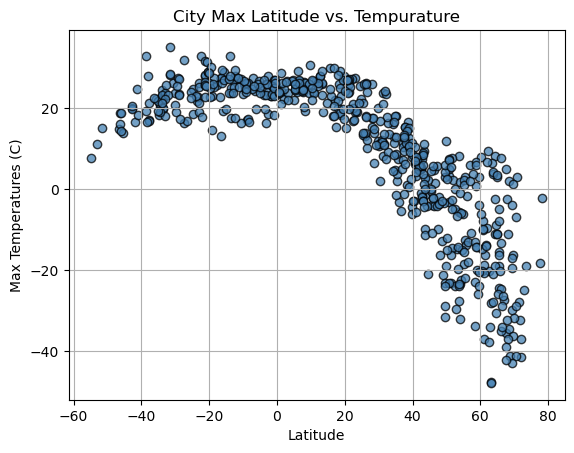

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

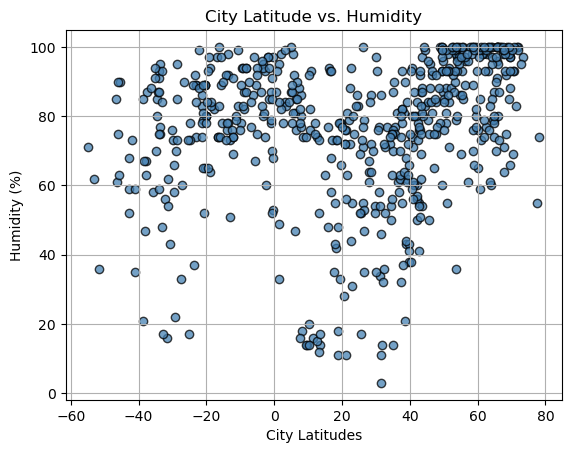

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

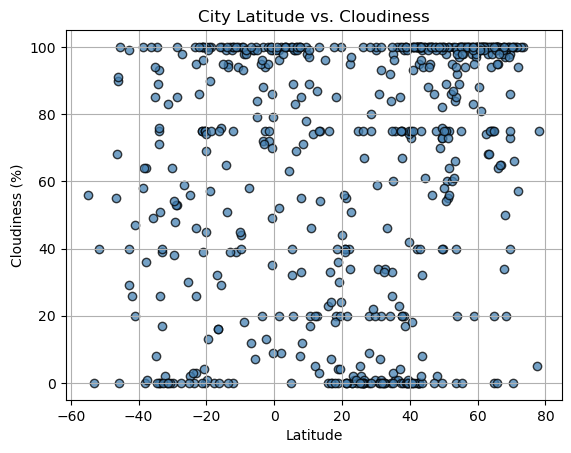

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

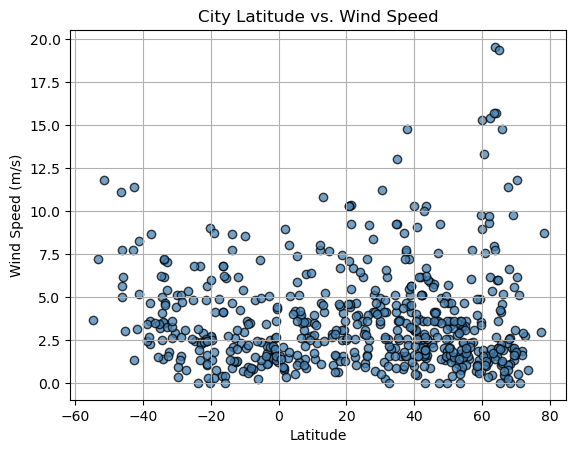

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lr_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = ( xc, yc)

    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker='o', color='steelblue', edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    
   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
norhem_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
norhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,-3.22,78,98,3.33,RU,1675639538
2,bongandanga,1.5000,21.0500,24.12,33,52,0.76,CD,1675639539
4,dikson,73.5069,80.5464,-19.10,97,100,0.74,RU,1675639539
6,rantauprapat,2.1000,99.8333,22.32,98,100,0.33,ID,1675639540
10,cherskiy,68.7500,161.3000,-41.29,100,100,2.06,RU,1675639542


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sthhem_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
sthhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cidreira,-30.1811,-50.2056,23.78,76,64,4.39,BR,1675639538
3,ushuaia,-54.8000,-68.3000,7.79,71,56,3.67,AR,1675638729
5,chuy,-33.6971,-53.4616,19.88,77,0,3.48,UY,1675639540
7,uyovu,-3.2833,31.5258,16.42,95,88,1.74,TZ,1675639541
8,bluff,-46.6000,168.3333,14.73,85,55,11.08,NZ,1675639541


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8447284798876332


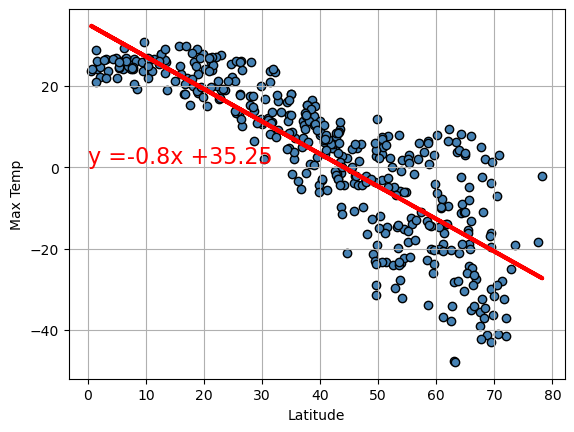

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Max Temp']
xc = 0
yc = 1

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.3746764475562049


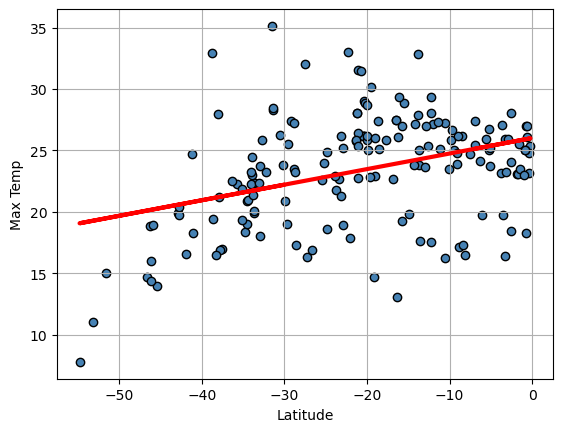

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Max Temp']
xc = -30
yc = 52

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42046342783614965


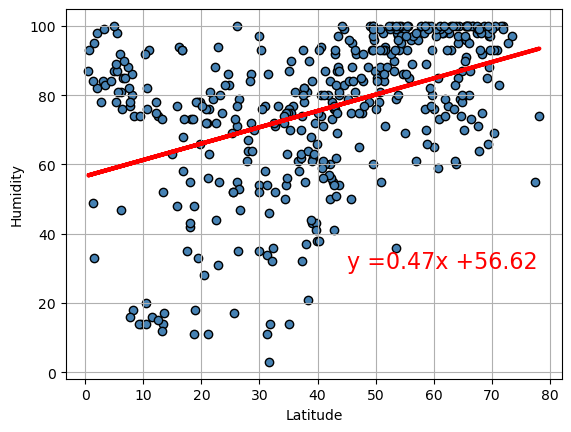

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Humidity']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.36465486531889957


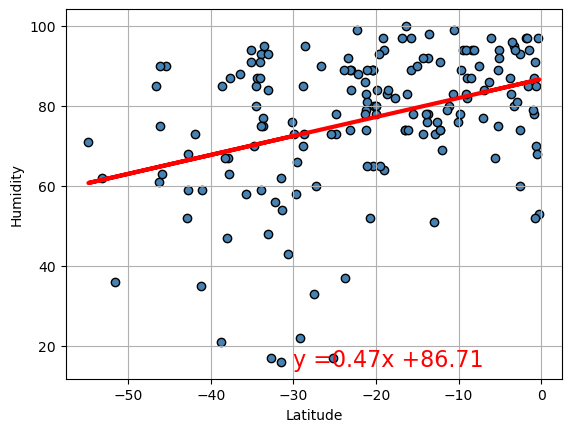

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Humidity']
xc = -30
yc = 15

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.32606610492820365


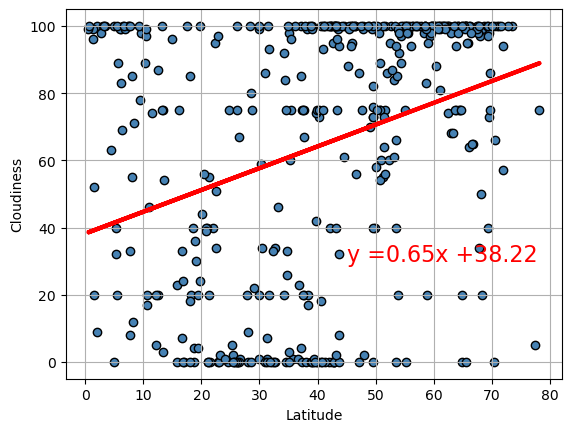

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Cloudiness']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.2882883357175277


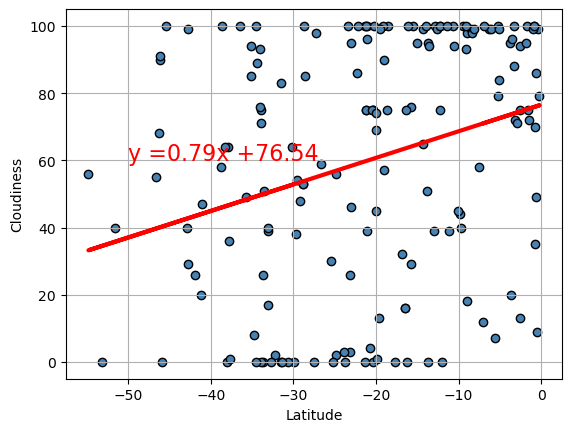

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Cloudiness']
xc = -50
yc = 60

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010686354070970292


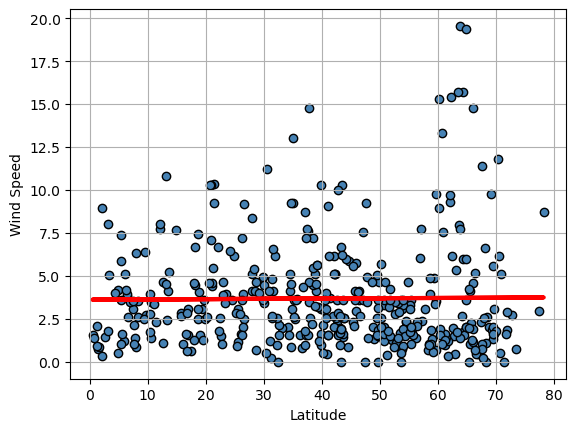

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Wind Speed']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.3931956001491692


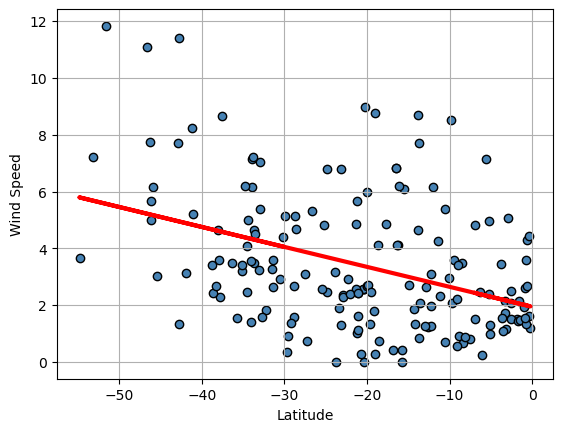

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Wind Speed']
xc = -45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()